### Git versioning

In [1]:
import git  #Requires Gitpython installed, to install do "$ pip install Gitpython" in your terminal
import pkg_resources
openfisca_france_location = pkg_resources.get_distribution('openfisca-france').location
repo = git.Repo(openfisca_france_location)
repo.git.status()

sha = repo.head.object.hexsha

print "---This notebook have been runed with--- \n","Openfisca-france :", repo.head.object.hexsha, '\n' 
print "Commit short SHA:", repo.git.rev_parse(sha, short=4)
print "Branch: ", repo.git.rev_parse('--abbrev-ref', "HEAD") #equivalent to: $git rev-parse --abbrev-ref HEAD
print "Date (y/m/d):", repo.git.show("-s", '--format=%ci', 'HEAD^')[:-5],"\n"  # equivalent to: $git show -s --format=%ci HEAD^

print "Openfisca-core :", git.Repo(pkg_resources.get_distribution('openfisca-core').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-core').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "Openfisca-france-data :", git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Aggregates :", git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Survey-Manager :", git.Repo(pkg_resources.get_distribution('OpenFisca-Survey-Manager').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]

---This notebook have been runed with--- 
Openfisca-france : 884e029dd9ec0f5dc8129a52e9a61f5cc87770aa 

Commit short SHA: 884e0
Branch:  mensualisation_wip
Date (y/m/d): 2016-05-30 16:54:22  

Openfisca-core : 4076f591f4bcb571391b65a989e1603fdc4cb759  Date: 2016-02-24 16:11:57 
Openfisca-france-data : 4581a82fd1456cbe0bdd86ab1b57db6fef37c8cf  Date: 2016-05-31 15:46:50 
OpenFisca-Aggregates : fd210d8cfdf6ed68f173d9d5c3eab4a4302ed2b9  Date: 2016-04-04 11:35:03 
OpenFisca-Survey-Manager : 868512d24307aa75cfa7bbbf8420542960963966  Date: 2016-04-04 11:35:03 


### Imports

In [2]:
%matplotlib inline
from __future__ import division

from openfisca_core import periods
from openfisca_plugin_aggregates.tests.reform.test_aggregates_mensualized import create_survey_scenario
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from numpy import (datetime64, logical_and as and_, logical_not as not_, logical_or as or_, logical_xor as xor_,
maximum as max_, minimum as min_, round)


#Faire des filtres pour Mahdi survey_scenario.create_data_frame_by_entity_key_plural

pd.set_option('expand_frame_repr', False)  #utile quand on utilise pandas en mode console
pd.set_option("display.max_rows",201)
pd.set_option("display.max_columns",201)

# Create Survey Scenario

In [3]:
period = periods.period(2009)

In [4]:
period.this_year.this_month

Period((u'month', Instant((2009, 1, 1)), 1))

In [5]:
survey_scenario = create_survey_scenario(2009)
survey_scenario.new_simulation()

In [6]:
print survey_scenario.compute_aggregate('rsa_mensuel')/10**9
print survey_scenario.compute_aggregate('rsa')/10**9

201.61088665
14.5210492278


In [7]:
for month in range(1,13):
    var = 'rsa_socle_majore_mensualise'
    print var, pd.Series(survey_scenario.simulation.calculate(var,'2009-{}'.format(month))*weight_familles).sum()/10**9
    var = 'nb_enfant_rsa'
    print var, pd.Series(survey_scenario.simulation.calculate(var,'2009-{}'.format(month))*weight_familles).sum()/10**9
    var = 'rsa_majore_eligibilite'
    print var, pd.Series(survey_scenario.simulation.calculate(var,'2009-{}'.format(month))*weight_familles).sum()

rsa_socle_majore_mensualise

NameError: name 'weight_familles' is not defined

In [ ]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('rsa_mensuel','2009-{}'.format(month))*weight_familles).sum()/10**9
    print pd.Series(survey_scenario.simulation.calculate('rsa','2009-{}'.format(month))*weight_familles).sum()/10**9

In [ ]:
for month in range(1,13):
    print np.sum(survey_scenario.simulation.calculate('nb_enfant_rsa', '2009-{}'.format(month))*weight_familles)/10**9
    print np.sum(survey_scenario.simulation.calculate('rsa_non_majore_mensualise', '2009-{}'.format(month))*weight_familles)/10**9
    print np.sum(survey_scenario.simulation.calculate('rsa_non_majore', '2009-{}'.format(month))*weight_familles)/10**9
    print '.'*10

In [ ]:
for month in range(1,13):
    print np.sum(survey_scenario.simulation.calculate('rsa_majore_mensualise', '2009-{}'.format(month))*weight_familles)/10**9
    print np.sum(survey_scenario.simulation.calculate('rsa_majore', '2009-{}'.format(month))*weight_familles)/10**9

In [ ]:
for month in range(1,13):
    print np.sum(survey_scenario.simulation.calculate('rsa_majore_mensualise', '2009-{}'.format(month))*weight_familles)/10**9
    print np.sum(survey_scenario.simulation.calculate('rsa_majore', '2009-{}'.format(month))*weight_familles)/10**9

In [ ]:
for month in range(1,13):
    filter_0 = (pd.Series(survey_scenario.simulation.calculate('ra_rsa', '2009-{}'.format(month)))<0)
    print pd.Series(survey_scenario.simulation.calculate('ra_rsa', '2009-{}'.format(month))).sum()
    print pd.Series(survey_scenario.simulation.calculate('ra_rsa', '2009-{}'.format(month)))[filter_0].sum()
    


In [ ]:
for month in range(1,13):
    print np.sum(survey_scenario.simulation.calculate('rsa_mensuel', '2009-{}'.format(month))*weight_familles)/10**9
    print np.sum(survey_scenario.simulation.calculate('rsa', '2009-{}'.format(month))*weight_familles)/10**9

In [ ]:
((pd.Series(survey_scenario.simulation.calculate_add('rsa', '2009'.format(month))))*weight_familles).sum()/10**9

In [ ]:
survey_scenario.compute_aggregate('rsa')/10**9

In [ ]:
print pd.Series(survey_scenario.simulation.calculate('irpp')* weight_foyers).sum()
print survey_scenario.compute_aggregate('irpp')

In [ ]:
print survey_scenario.compute_aggregate.__getattribute__

In [ ]:
month = 8
print np.sum(survey_scenario.simulation.calculate('rsa_mensuel', '2009-{}'.format(month))*weight_familles)*12/10**9
print np.sum(survey_scenario.simulation.calculate('rsa', '2009-{}'.format(month))*weight_familles)*12/10**9

##### weights

In [8]:
weight_foyers = survey_scenario.simulation.calculate_add('weight_foyers', period = period).astype(float)
weight_menages = survey_scenario.simulation.calculate_add('wprm', period = period).astype(float)
weight_familles = survey_scenario.simulation.calculate_add('weight_familles', period = period).astype(float)
weight_individus = survey_scenario.simulation.calculate_add('weight_individus', period = period).astype(float)

In [9]:
print weight_foyers.shape , "foyers fiscaux"
print weight_menages.shape , "ménages"
print weight_familles.shape, "familles"
print weight_individus.shape, "individus"

(59874,) foyers fiscaux
(49016,) ménages
(55306,) familles
(112359,) individus


In [10]:
print weight_foyers.sum() , "foyers fiscaux"
print weight_menages.sum() , "ménages"
print weight_familles.sum(), "familles"
print weight_individus.sum(), "individus"

33262201.0 foyers fiscaux
27299608.0 ménages
30475517.0 familles
61228244.0 individus


In [11]:
variable = 'revdisp_mensuel_ir_mensuel'
monthly_df = pd.DataFrame(
                dict((column_name+"_"+period, survey_scenario.simulation.calculate_add(column_name, period)) 
                for period in ['{}-{}'.format( 2009, str(month).zfill(2)) for month in range(1, 13)] for column_name in [variable]) #TODO mensualize : allow for periods
                )
#monthly_df.T

In [12]:
#monthly_df.T
monthly_df['revdisp_mensuel_ir_mensuel_2009-09'].mean()

2523.0737

In [13]:
survey_scenario.compute_aggregate('revdisp_mensuel_annuel')/27000000

30130.540696240249

In [14]:
survey_scenario.compute_aggregate('revdisp_mensuel_ir_mensuel')/27000000

29906.239867692482

In [15]:
survey_scenario.compute_aggregate('revdisp_mensuel_ir_mensuel')/27000000

29906.239867692482

In [16]:
pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')).value_counts()#TODO !

 0.000000e+00    37530
 1.220703e-04     2228
-1.220703e-04     2199
 6.103516e-05     1800
 2.441406e-04     1791
-6.103516e-05     1662
-2.441406e-04     1591
-3.051758e-05     1246
-4.882812e-04      948
 3.051758e-05      946
 4.882812e-04      879
 1.525879e-05      654
-1.525879e-05      530
-9.765625e-04      506
-3.662109e-04      499
 3.662109e-04      438
 9.155273e-05      372
-1.831055e-04      360
 9.765625e-04      356
 1.831055e-04      291
 7.324219e-04      273
-7.629395e-06      270
-7.324219e-04      269
 7.629395e-06      262
-4.577637e-05      209
 1.953125e-03      183
-1.953125e-03      139
-9.155273e-05      122
-1.464844e-03      109
 1.464844e-03      106
 2.288818e-05       93
-3.051758e-04       78
-3.906250e-03       62
 3.051758e-04       62
 4.577637e-05       58
 3.906250e-03       56
 6.103516e-04       52
-6.103516e-04       50
-2.929688e-03       48
-1.220703e-03       46
 2.929688e-03       41
 1.192093e-07       37
-3.814697e-06       35
 3.814697e-

In [17]:
survey_scenario.compute_aggregate('irpp')

-48038862065.683533

In [18]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('mini_mensuel','2009-{}'.format(month))).mean()


34.2266
32.6167
32.6259
36.6794
32.629
101.026
101.054
99.5985
98.7183
105.19
94.9645
95.2528


In [19]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('revdisp_mensuel_annuel','2009-{}'.format(month))).mean()


2454.44
2385.59
2390.59
2391.14
2394.35
2478.4
2484.54
2499.78
2528.62
2551.55
3160.3
2561.03


In [20]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('revdisp_mensuel_ir_mensuel','2009-{}'.format(month))).mean()


2452.65
2385.44
2390.57
2392.28
2394.91
2478.81
2484.7
2498.23
2523.07
2543.27
2981.98
2547.92


In [21]:
for month in range(1,13):
    print 'annuel', pd.Series(survey_scenario.simulation.calculate('utility_ir_annuel','2009-{}'.format(month))).mean()
    print 'mensuel', pd.Series(survey_scenario.simulation.calculate('utility_ir_mensuel','2009-{}'.format(month))).mean()

annuel -0.000375305
mensuel -0.000375155
annuel -0.000378226
mensuel -0.000378066
annuel -0.000377984
mensuel -0.000377829
annuel -0.000377674
mensuel -0.00037751
annuel -0.000377666
mensuel -0.000377521
annuel -0.000372711
mensuel -0.000372557
annuel -0.000372477
mensuel -0.000372328
annuel -0.000371978
mensuel -0.000371871
annuel -0.000371263
mensuel -0.000371212
annuel -0.000371038
mensuel -0.000370972
annuel -0.00036046
mensuel -0.000361614
annuel -0.00037105
mensuel -0.000371069


In [22]:
decote_monthly = pd.Series(survey_scenario.simulation.calculate_add("decote_gain_fiscal_mensuel_times_12")/12)
decote_annual =  pd.Series(survey_scenario.simulation.calculate_add('decote_gain_fiscal'))

In [23]:
(pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009')) < 0 ).value_counts()

False    49016
dtype: int64

In [24]:
revdisp = pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009'))
revdisp = pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009'))
#revdisp[revdisp<0]

In [25]:
decote = survey_scenario.simulation.calculate('decote_menage')
decote_mensuel = survey_scenario.simulation.calculate_add('decote_mensuel_menage')

In [26]:
survey_scenario.compute_aggregate("utility_ir_annuel")

-119564.20290579577

In [27]:
survey_scenario.compute_aggregate("ra_rsa_i_mensualise")

552972832152.5885

In [28]:
for presta in ['rev_trav_mensuel' , 'pen_mensuel' , 'psoc_mensuel','ppe']:
    print presta
    for month in range(1,13):
        print pd.Series(survey_scenario.simulation.calculate(presta,'2009-{}'.format(month))).mean()


rev_trav_mensuel
813.492
810.8
811.185
810.757
811.691
813.136
814.277
817.74
824.117
835.849
836.74
841.17
pen_mensuel
241.897
242.088
243.89
242.802
245.302
248.539
250.039
254.043
260.873
255.497
526.99
258.776
psoc_mensuel
90.8147
33.9602
33.9681
38.0176
33.9671
102.379
102.377
100.926
100.026
106.48
96.2289
96.4877
ppe
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515


## Compare IRPP on monthly basis vs. on annual basis

In [29]:
print survey_scenario.compute_aggregate('irpp')/10**9
print survey_scenario.compute_aggregate('irpp_mensuel')/10**9
print u"l'impôt mensuel mène à un prélèvement de {} euros en plus".format(survey_scenario.compute_aggregate('irpp_mensuel')-survey_scenario.compute_aggregate('irpp') )

-48.0388620657
-53.8233637481
l'impôt mensuel mène à un prélèvement de -5784501682.38 euros en plus


In [30]:
pd.Series(survey_scenario.simulation.calculate("irpp") == survey_scenario.simulation.calculate("irpp_mensuel")).value_counts()

False    35248
True     24626
dtype: int64

In [31]:
#np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('irpp'),survey_scenario.simulation.calculate_add("irpp_mensuel"), decimal = -0,
#                                    )

#### Lambda compensation

In [32]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))

In [33]:
execute_time_consuming_graph = False
if execute_time_consuming_graph == True : 
    lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
    lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
    filtr_near0 = np.abs(lambda_compensation)-0.2 >= 0
    lambda_compensation[filtr_near0 ].hist(bins = 70000, weights = pd.Series(weight_foyers)[filtr_near0 ].values)
    plt.xlim(-20,20)

In [34]:
if execute_time_consuming_graph == True :
    lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
    lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation[np.abs(lambda_compensation)-0.2 >= 0 ].hist(bins = 700000)
    plt.xlim(-20,20)

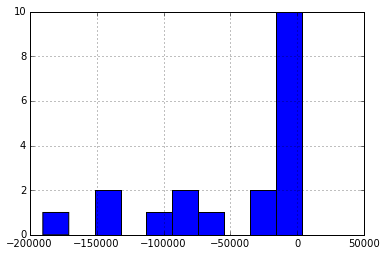

In [35]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
lambda_compensation[np.abs(lambda_compensation)-2000 >= 0 ].hist(bins = 10)
#plt.xlim(-20,20)

#### Pourcentage du sample à 0

In [36]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
#lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
#lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)==0].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda égal à 0 ".format(round(prct1,2)*100)

50.0 % du sample à un lambda égal à 0 


#### Pourcentage du sample presque à 0

In [37]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)<0.01].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda égal à 0 ".format(round(prct1,2)*100)

90.0 % du sample à un lambda égal à 0 


#### Pourcentage du sample > ou < à  0

In [38]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<0].shape[0]/lambda_compensation.shape[0]
prct2 = lambda_compensation[lambda_compensation>0].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda < à 0 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0 ".format(round(prct2,2)*100)

23.0 % du sample à un lambda < à 0 
28.0 % du sample à un lambda > à 0 


In [39]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<-0.01].shape[0]/lambda_compensation.shape[0]
prct2 = lambda_compensation[lambda_compensation>0.01].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda < à -0.01 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0.01 ".format(round(prct2,2)*100)

2.0 % du sample à un lambda < à -0.01 
7.0 % du sample à un lambda > à 0.01 


#### Pourcentage du sample entre -20 et 20

In [40]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)>70].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda supérieur  à 70 ".format(round(prct1,2)*100)

1.0 % du sample à un lambda supérieur  à 70 


#### Lambda compensation négatif du à la décote ?

In [41]:
pd.Series(survey_scenario.simulation.calculate_add("decote_mensuel_times_12")/12).mean()

179.2312

In [42]:
decote_monthly = pd.Series(survey_scenario.simulation.calculate_add("decote_mensuel_times_12")/12)
decote_annual =  pd.Series(survey_scenario.simulation.calculate_add("decote"))

In [43]:
filtre_unequal_decote = decote_monthly != decote_annual

In [44]:
lambda_compensation[filtre_unequal_decote].shape

(23034,)

(-20, 20)

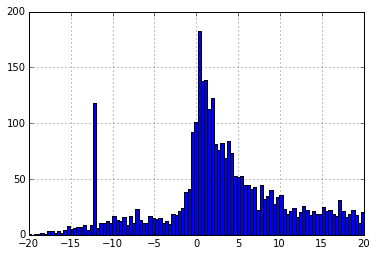

In [45]:
lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)].hist(bins = 500)
plt.xlim(-20,20)

In [46]:
to_graph = lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)]


In [47]:
poids = pd.Series(weight_foyers)[
        filtre_unequal_decote&
        (np.abs(lambda_compensation)>.1)&
        (np.abs(lambda_compensation)<100)]

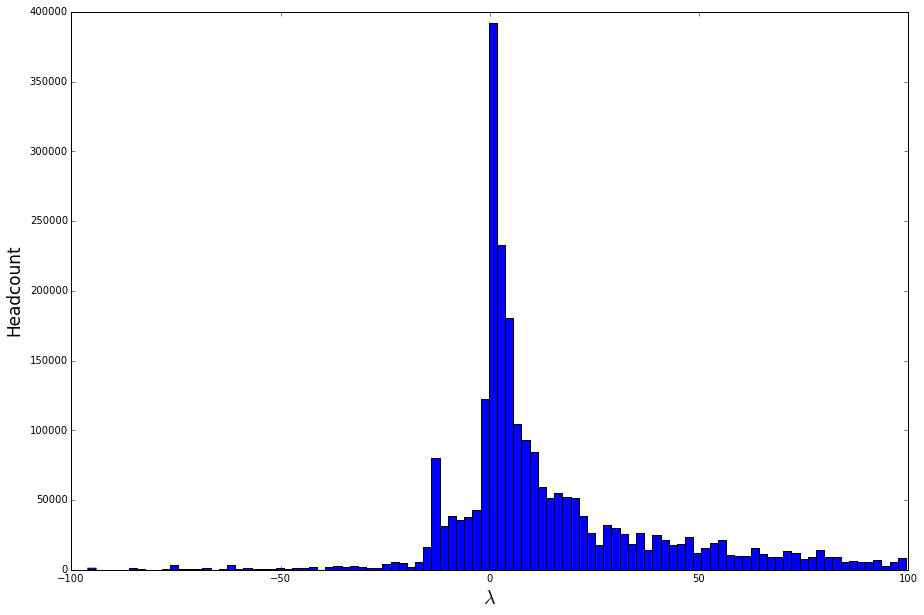

In [302]:
plt.figure(figsize=(15,10))
plt.hist(to_graph.values, bins = 100, weights = poids.values)
plt.xlabel(r'$\lambda$',fontsize = 20 )
plt.ylabel('Headcount',fontsize = 17)

In [49]:
lambda_zero = pd.Series(lambda_compensation == 0 )
pd.Series(weight_foyers)[lambda_zero].sum()



16291830.0

In [50]:
index_exceptional_lambda = lambda_compensation[np.abs(lambda_compensation)>100].index

In [51]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation'])['foyers_fiscaux']
df['decote_gain_fiscal_mensuel'] = df.decote_gain_fiscal_mensuel_times_12/12
df.iloc[index_exceptional_lambda]

,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation,decote_gain_fiscal_mensuel
4,252.503723,146.684967,-108.488831,-1942.908325,202.905991,12.223747
128,218.857468,0.000000,-209.427597,-3179.729248,170.195419,0.000000
234,238.712494,0.000000,-149.862518,-1831.854126,134.682770,0.000000
405,269.017517,2914.672363,0.400000,-25.741962,-784.258911,242.889359
468,-0.000000,0.000000,-425.854980,-5981.230957,156.542755,0.000000
588,133.102509,0.000000,-466.692474,-4444.631348,102.284203,0.000000
590,248.447495,0.000000,-120.657516,-5307.629395,515.870605,0.000000
1892,231.562500,0.000000,-171.312500,-5638.628906,382.971466,0.000000
2104,232.910004,0.000000,-167.269989,-3604.862549,246.613953,0.000000
2246,254.062500,0.000000,-103.812500,-4504.193848,508.653381,0.000000


In [52]:
survey_scenario.simulation.calculate("irpp_mensuel","2009-08")[4]

-971.45416

In [53]:
df["difference"] = np.abs(df.decote_gain_fiscal- df.decote_gain_fiscal_mensuel)>0.01
df[lambda_compensation == -12].difference.value_counts()

True     102
False      5
dtype: int64

In [54]:
df.shape

(59874, 7)

In [55]:
df[lambda_compensation == -12][['decote_gain_fiscal', 'decote_gain_fiscal_mensuel', 'lambda_compensation',"irpp",'irpp_mensuel' ]]

,decote_gain_fiscal,decote_gain_fiscal_mensuel,lambda_compensation,irpp,irpp_mensuel
743,157.952423,239.030014,-12,-392.142731,-0
1391,257.068756,273.102509,-12,-94.793732,-0
1666,175.872437,262.359161,-12,-338.382690,-0
2221,262.664978,244.310043,-12,-78.005035,-0
2560,211.432495,207.514969,-12,-231.702515,-0
3334,197.922501,82.885002,-12,-272.232483,-0
3482,231.988785,257.262482,-12,-170.033646,-0
3983,137.402496,0.000000,-12,-453.792511,-0
4108,254.827515,0.000000,-12,-101.517456,-0
4374,252.522507,0.000000,-12,-108.432480,-0


In [56]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
df.lambda_compensation[df.lambda_compensation< -70] = 0

In [57]:
df[np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)+1>0].shape

(59874, 5)

(-20, 20)

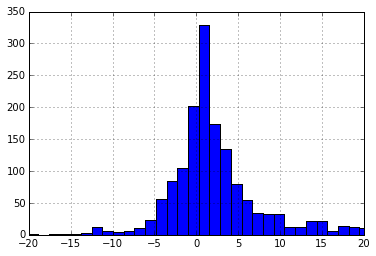

In [58]:
df.lambda_compensation[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-1<0)
                      & (np.abs(df.lambda_compensation)>0.1)].hist(bins = 100)
plt.xlim(-20,20)

In [59]:
df.lambda_compensation[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-0.1>0)
                      & (np.abs(df.lambda_compensation)>0.1)].mean()

7.6328607

In [60]:
df[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-0.1>0)
                      & (np.abs(df.lambda_compensation)>0.1)]

,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
7,-0.000000,223.836288,-2966.810059,-7234.854004,17.263165
10,0.000000,39.012215,153.500000,-41.694618,-15.259514
38,76.113708,42.886242,-576.658875,-897.256348,6.671482
57,121.699951,185.417496,-347.900146,-156.747498,-6.593362
67,-0.000000,136.980972,-950.567383,-1734.394775,9.895069
74,133.872498,0.000000,-464.382507,-1367.037476,23.325294
85,16.202515,0.000000,-817.392456,-5112.797852,63.060120
101,220.742493,0.000000,-203.772522,-754.381226,32.424900
157,49.032501,59.248749,-718.902466,-741.326172,0.374299
159,83.599976,0.000000,69.500000,-210.421295,-48.331738


In [61]:
df[df.lambda_compensation<-1]

,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
10,0.000000,39.012215,153.500000,-41.694618,-15.259514
57,121.699951,185.417496,-347.900146,-156.747498,-6.593362
159,83.599976,0.000000,69.500000,-210.421295,-48.331738
219,39.092499,209.385391,-748.722534,-93.510429,-10.501281
273,44.823730,218.486313,-578.528809,-57.541183,-10.806465
372,-0.000000,-0.000000,-1407.664917,-1190.384888,-1.852259
450,-0.000000,0.000000,-1409.734985,272.399994,-14.318733
554,-0.000000,-0.000000,-1104.777588,-1007.197327,-1.059908
722,152.197510,232.167496,-73.407471,166.502502,-39.218346
743,157.952423,239.030014,-392.142731,-0.000000,-12.000000


In [62]:
df[df.lambda_compensation<-1][df.decote_gain_fiscal> df.decote_gain_fiscal_mensuel_times_12]

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
159,83.599976,0.000000,69.500000,-210.421295,-48.331738
1886,118.345001,0.000000,171.535004,-707.201294,-61.473377
2200,163.817490,0.000000,1253.000000,-258.154144,-14.472346
2221,262.664978,244.310043,-78.005035,-0.000000,-12.000000
2245,182.545105,27.949804,110.000000,-166.983917,-30.216427
2433,147.207520,131.401535,147.000000,131.180328,-1.291402
2560,211.432495,207.514969,-231.702515,-0.000000,-12.000000
3170,6.792513,0.000000,191.800003,-564.493103,-47.317608
3334,197.922501,82.885002,-272.232483,-0.000000,-12.000000
3444,260.589996,0.000000,909.200012,302.976807,-8.001186


## Compensated irpp

In [63]:
print max(pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')))
print min(pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')))

0.09375
-0.03125


In [64]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation', 'compensated_irpp_mensuel'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
#df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
#df.lambda_compensation[df.lambda_compensation< -70] = 0
#df.compensated_irpp_mensuel = df.compensated_irpp_mensuel
df

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
0,0.000000,5.894867,10.871246,0.000000,-7.903255,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
2,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
3,-1378.829712,-0.000000,-0.000000,-1378.829712,-1378.829956,1.907349e-06
4,-108.488831,252.503723,12.223747,-108.488831,-1942.908325,2.029060e+02
5,-792.612549,24.462494,24.462494,-792.612549,-792.612366,-2.861023e-06
6,-9160.150391,-0.000000,-0.000000,-9160.150391,-9160.149414,-9.536743e-07
7,-2966.809814,-0.000000,223.836288,-2966.810059,-7234.854004,1.726316e+01
8,0.000000,230.505005,230.504959,0.000000,-0.000000,0.000000e+00
9,0.000000,102.025002,102.025017,0.000000,-0.000000,0.000000e+00


In [65]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation', 'compensated_irpp_mensuel'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
#df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
#df.lambda_compensation[df.lambda_compensation< -70] = 0
#df.compensated_irpp_mensuel = df.compensated_irpp_mensuel
df

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
0,0.000000,5.894867,10.871246,0.000000,-7.903255,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
2,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
3,-1378.829712,-0.000000,-0.000000,-1378.829712,-1378.829956,1.907349e-06
4,-108.488831,252.503723,12.223747,-108.488831,-1942.908325,2.029060e+02
5,-792.612549,24.462494,24.462494,-792.612549,-792.612366,-2.861023e-06
6,-9160.150391,-0.000000,-0.000000,-9160.150391,-9160.149414,-9.536743e-07
7,-2966.809814,-0.000000,223.836288,-2966.810059,-7234.854004,1.726316e+01
8,0.000000,230.505005,230.504959,0.000000,-0.000000,0.000000e+00
9,0.000000,102.025002,102.025017,0.000000,-0.000000,0.000000e+00


In [66]:
df[df.compensated_irpp_mensuel - df.irpp<2][['irpp', 'compensated_irpp_mensuel', 'irpp_mensuel']]

,irpp,compensated_irpp_mensuel,irpp_mensuel
0,0.000000,0.000000,-7.903255
1,0.000000,0.000000,-0.000000
2,0.000000,0.000000,-0.000000
3,-1378.829712,-1378.829712,-1378.829956
4,-108.488831,-108.488831,-1942.908325
5,-792.612549,-792.612549,-792.612366
6,-9160.150391,-9160.150391,-9160.149414
7,-2966.810059,-2966.809814,-7234.854004
8,0.000000,0.000000,-0.000000
9,0.000000,0.000000,-0.000000


In [67]:
print survey_scenario.compute_aggregate('compensated_irpp_mensuel')
print survey_scenario.compute_aggregate('irpp')

-48038862125.8
-48038862065.7


In [68]:
impot_mensuel_times_12 = survey_scenario.simulation.calculate("irpp_mensuel", period)*12
lambda_compensation = survey_scenario.simulation.calculate("lambda_compensation", period.this_year)



compensated_irpp = impot_mensuel_times_12/(12 + lambda_compensation)

In [69]:
compensated_irpp[743]

nan

In [70]:
(survey_scenario.simulation.calculate("irpp", period.this_year) == 0)*0

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
compensated_irpp = (survey_scenario.simulation.calculate("irpp", period.this_year) == 0) * 0 + \
                ~(survey_scenario.simulation.calculate("irpp", period.this_year) == 0) * np.nan_to_num(compensated_irpp) ;compensated_irpp[[4,743]]

array([-108.48883057,    0.        ])

In [72]:
compensated_irpp = (
                (survey_scenario.simulation.calculate_add("irpp_mensuel", period) == 0) * #Condition
                (survey_scenario.simulation.calculate("irpp", period.this_year)/12) # on répartit sur l'année
            ) + ~(survey_scenario.simulation.calculate_add("irpp_mensuel", period) == 0) * compensated_irpp #condition opposée
compensated_irpp[[4,743]]

array([-108.48883057,  -32.67856216])

In [73]:
df[df.lambda_compensation.isnull()]

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation


In [74]:
survey_scenario.simulation.calculate_add('irpp')

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [75]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')

-48038862125.764519

In [76]:
lambda_compensation = survey_scenario.simulation.calculate('lambda_compensation')
np.all(lambda_compensation != np.nan)
lambda_compensation != np.nan
hello = lambda_compensation[1]
assert np.all(np.isfinite(lambda_compensation))


In [77]:
sal_pen_df = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['irpp'], ['irpp_mensuel','compensated_irpp_mensuel'])['foyers_fiscaux']

sal_pen_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,59774,59775,59776,59777,59778,59779,59780,59781,59782,59783,59784,59785,59786,59787,59788,59789,59790,59791,59792,59793,59794,59795,59796,59797,59798,59799,59800,59801,59802,59803,59804,59805,59806,59807,59808,59809,59810,59811,59812,59813,59814,59815,59816,59817,59818,59819,59820,59821,59822,59823,59824,59825,59826,59827,59828,59829,59830,59831,59832,59833,59834,59835,59836,59837,59838,59839,59840,59841,59842,59843,59844,59845,59846,59847,59848,59849,59850,59851,59852,59853,59854,59855,59856,59857,59858,59859,59860,59861,59862,59863,59864,59865,59866,59867,59868,59869,59870,59871,59872,59873
irpp,0.000000,0,0,-1378.829712,-108.488831,-792.612549,-9160.150391,-2966.810059,0,0,153.500000,-2335.952637,0,-1309.255005,0,-2104.827637,0.000000,166.152588,-4151.707031,-3237.300049,-2124.675049,-877.314941,-601.944092,737.799988,0.000000,-1072.575317,-1089.632202,-433.722321,0,0.00000,0,-1132.755005,-1087.487549,0,0.000000,778.040283,-79.077332,-5260.950195,-576.658875,-1171.852295,-157.122513,-1710.030518,-8168.149902,-502.418640,-7868.875000,-7178.475098,-7609.375000,0,-700.632874,0,0,0,0,0,0.0000,-557.202698,-219.863785,-347.900146,0.00000,-100.774826,-1554.069702,0,-1177.890015,0,-1053.290039,-176.052505,-25070.472656,-950.567383,0.000000,-7382.575195,-1490.895020,-902.614990,-956.515015,0.000000,-464.382507,-19810.775391,-306.282501,-839.862549,-2150.909424,0.000000,-2422.667725,128.607910,221.765015,-781.379395,0,-817.392456,-1687.875000,-2443.069336,-712.655029,-1361.430542,-504.814941,-450.965210,0.000000,0,-244.102661,-607.182739,0,-1016.015015,-2660.685059,0,...,0.0000,-601.302246,0.000000,-1093.915039,0,-474.908691,-948.814697,-2816.445068,-1445.395020,0,-1058.574951,-2052.189941,-595.650024,-267.612518,-1248.135010,-499.992493,-4005.529785,-1531.915039,0,-319.692688,-202.414978,-321.545105,0.00000,-3714.446777,-2004.694702,-687.770264,0,-748.354553,-1434.970215,-424.152496,-244.002533,-163.542511,0.000000,-202.538803,-597.724976,-9831.699219,-257.890350,0,-1735.875000,-4654.606934,720.587402,0,0,0,0,-414.822540,0,-551.364990,0.000000,-1313.714966,0,-694.752075,0,0,0,-1803.330322,-2510.689941,-122.678955,0,-837.510071,-881.647339,0,-1013.949707,0,-2144.870117,-1179.814941,714.760010,-820.122070,-6603.650879,-476.045013,0,-994.734985,-1435.174683,-699.807495,-322.212524,0,0,-1994.087402,0,0,0,0,0,0,-2146.514893,-15008.900391,-315.072510,0,-7257.776367,-2652.369873,-3179.347412,0.000000,-2050.929932,-198.942520,-1824.654785,-12667.373047,0,0.000000,0,0
compensated_irpp_mensuel_2009-01,0.000000,0,0,-114.902489,0.000000,-66.051056,-763.345947,-4.560170,0,0,-47.092911,-194.662720,0,1.160107,0,-175.402283,0.000000,13.846048,-345.975586,-269.775024,-177.056259,5.842635,-50.162003,61.483326,0.000000,-89.381279,-90.802673,-36.143524,0,0.00000,0,-94.396263,-90.623962,0,0.000000,64.836700,-6.589777,-438.412476,3.267014,-97.654358,-13.093544,-142.502563,-680.679138,-41.868217,-655.739502,-598.206360,-634.114563,0,-58.386074,0,0,0,0,0,0.0000,-46.433563,-18.321983,-28.991678,0.00000,-8.397902,-129.505783,0,0.000000,0,-87.774170,-14.671043,-2089.205811,-12.089419,0.000000,-615.214478,-124.241272,-75.217918,-79.709579,0.000000,0.000000,-1650.897705,-25.523539,-69.988548,-179.242477,0.000000,-201.888992,10.717326,18.480419,-65.114952,0,0.000000,-187.541641,-203.589127,-59.387913,-113.452560,-42.067917,-37.580429,0.000000,0,-20.341888,-50.598564,0,-84.667923,-221.723755,0,...,0.0000,-50.108521,0.000000,-91.159599,0,-39.575726,-79.067886,-234.703735,-160.599442,0,-88.214569,-171.015808,-49.637497,-22.301043,-104.011261,-41.666039,-11.911106,0.000000,0,-26.641056,0.000000,-26.795427,0.00000,-309.537201,-167.057907,-57.314194,0,-62.362877,-119.580856,1.13

In [78]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')

-48038862125.764519

## Utility annalysis 

In [79]:
survey_scenario.compute_aggregate("utility_ir_annuel") #TODO : find why Nan

-119564.20290579577

In [80]:
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_annuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_compensated_ir_mensuel','2009')).mean()

-0.00447783
-0.0044777
-0.00447585


In [81]:
u_c_ir = pd.Series(survey_scenario.simulation.calculate_add('utility_compensated_ir_mensuel','2009'))
u_ir_m = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel','2009'))
u_ir_a = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_annuel','2009'))

In [82]:
print u_c_ir.mean(),1/u_c_ir.mean()
print u_ir_m.mean(),1/u_ir_m.mean()
print u_ir_a.mean(),1/u_ir_a.mean()

-0.00447585 -223.421381761
-0.0044777 -223.328744495
-0.00447783 -223.322288077


In [83]:
print u_c_ir.describe()
print u_ir_m.describe()
print u_ir_a.describe()

count    49016.000000
mean        -0.004476
std          0.000822
min         -0.006125
25%         -0.005011
50%         -0.004504
75%         -0.003924
max         -0.000247
dtype: float64
count    49016.000000
mean        -0.004478
std          0.000823
min         -0.006125
25%         -0.005013
50%         -0.004505
75%         -0.003925
max         -0.000247
dtype: float64
count    49016.000000
mean        -0.004478
std          0.000822
min         -0.006125
25%         -0.005012
50%         -0.004505
75%         -0.003925
max         -0.000247
dtype: float64


In [84]:
print 1/u_c_ir.describe()
print 1/u_ir_m.describe()
print 1/u_ir_a.describe()

count       0.000020
mean     -223.421382
std      1216.542554
min      -163.268352
25%      -199.554894
50%      -222.030361
75%      -254.840315
max     -4051.598892
dtype: float64
count       0.000020
mean     -223.328744
std      1215.747517
min      -163.268352
25%      -199.484962
50%      -221.981854
75%      -254.764438
max     -4051.598892
dtype: float64
count       0.000020
mean     -223.322288
std      1216.461583
min      -163.268352
25%      -199.536690
50%      -221.968397
75%      -254.749176
max     -4051.598892
dtype: float64


(0, 200)

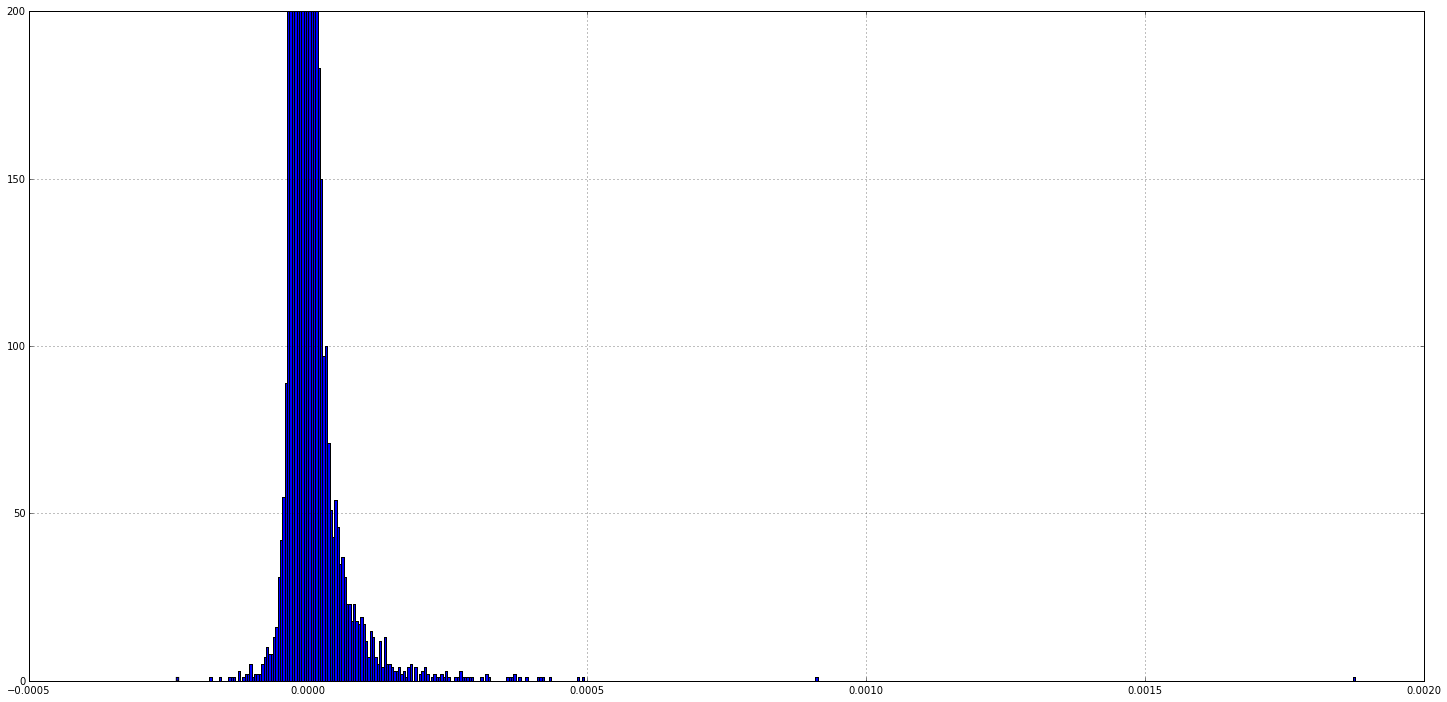

In [85]:
((u_ir_m - u_ir_a)).hist(bins = 500, figsize = (25,12))
plt.ylim(0,200)

In [86]:
((u_ir_m - u_ir_a)<-0.0000001).value_counts()

False    42285
True      6731
dtype: int64

(0, 200)

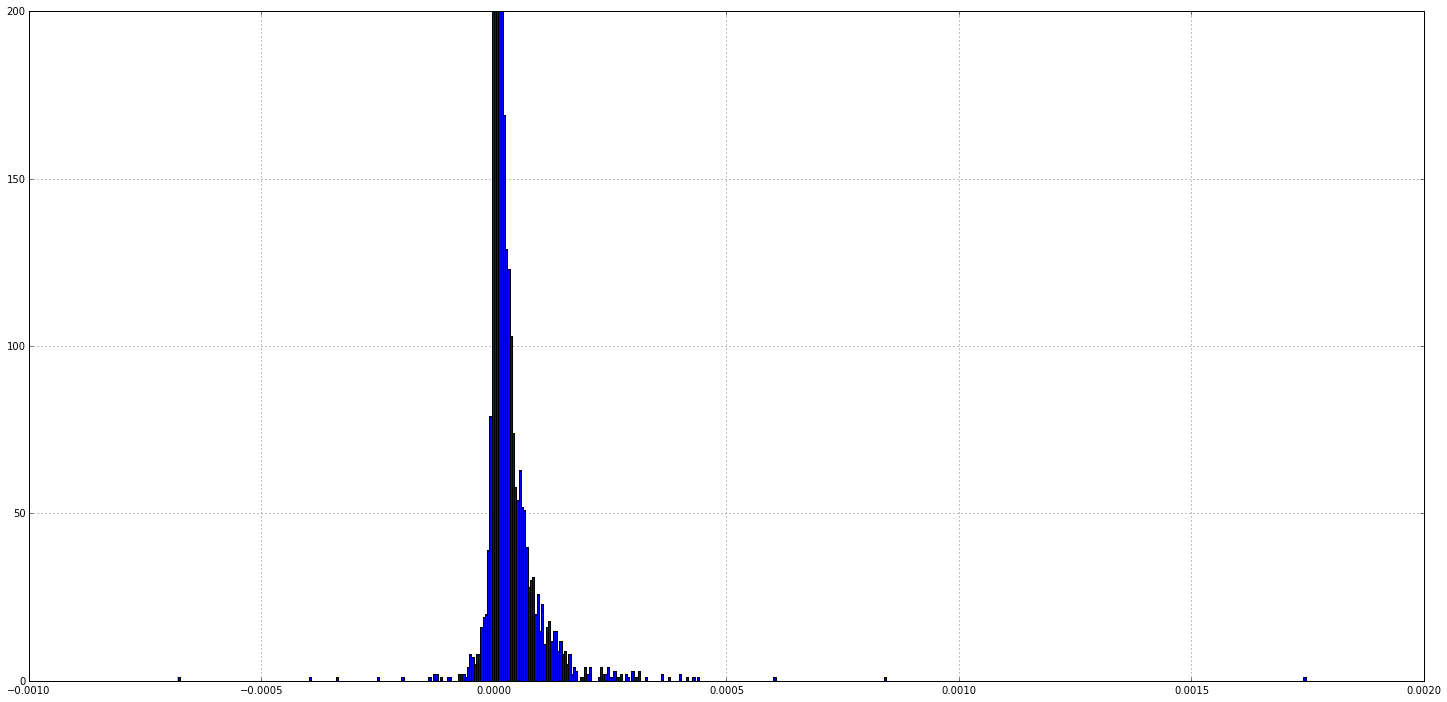

In [87]:
((u_c_ir - u_ir_a)).hist(bins = 500, figsize = (25,12))
plt.ylim(0,200)

In [88]:
((u_c_ir - u_ir_a)<-0.0000001).value_counts()

False    48344
True       672
dtype: int64

##### Graphs with weights

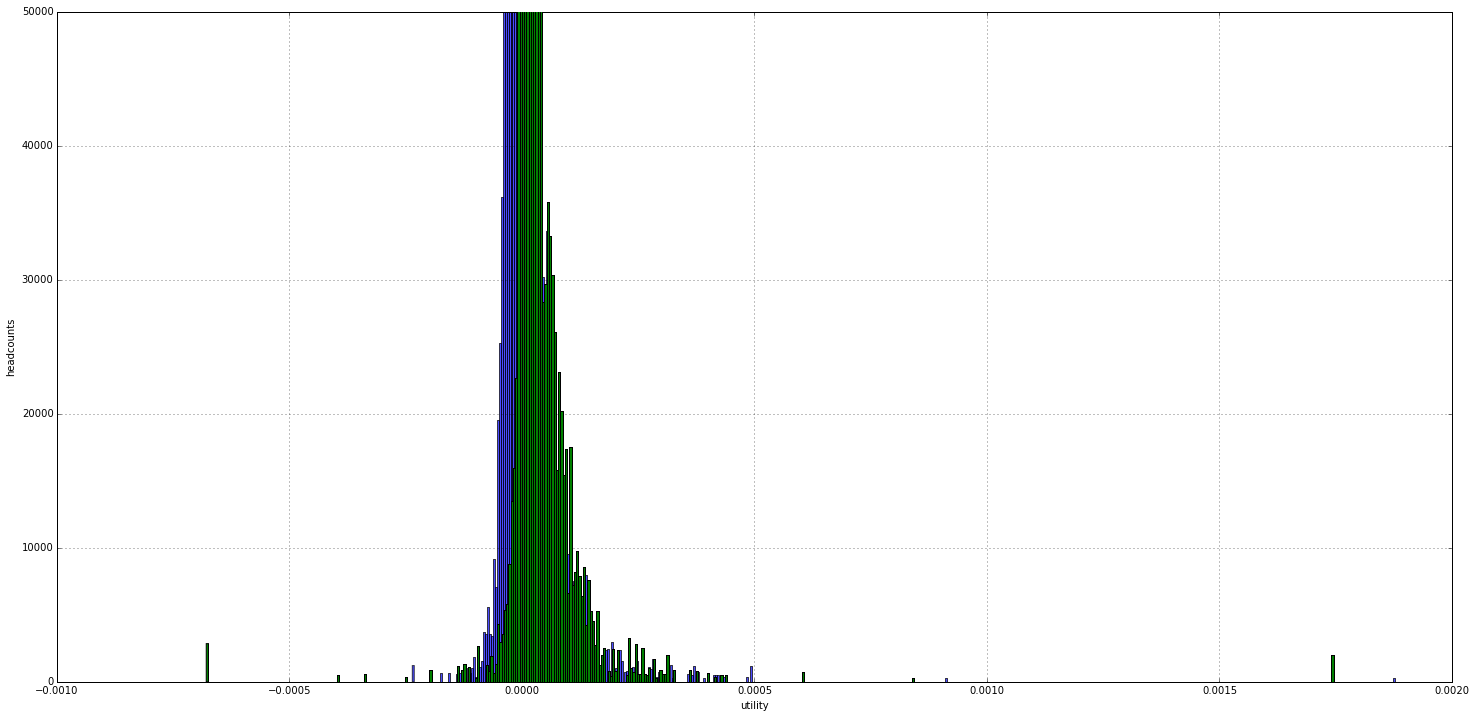

In [89]:
((u_ir_m - u_ir_a)).hist(bins = 500, figsize = (25,12), zorder=1, alpha = 0.7, weights = weight_menages,)
((u_c_ir - u_ir_a)).hist(bins = 500, figsize = (25,12), weights = weight_menages,zorder=10, alpha = 1)
plt.ylim(0,5*10**4)
plt.xlabel('utility')
plt.ylabel('headcounts')

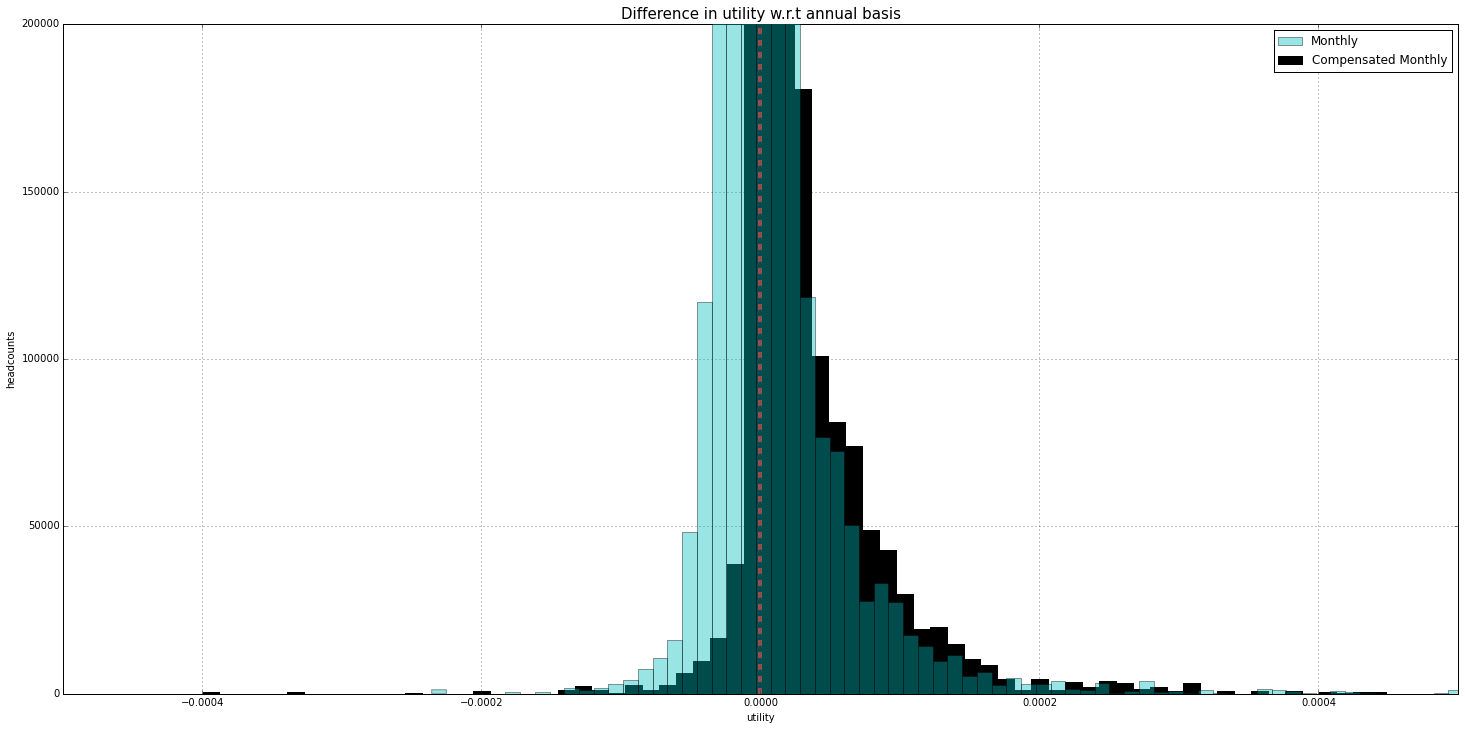

In [90]:
hist1 = ((u_ir_m - u_ir_a)).hist(bins = 200, figsize = (25,12), weights = weight_menages, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a)).hist(bins = 200, figsize = (25,12), weights = weight_menages,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
plt.ylim(0,20*10**4)
plt.xlim(-0.0005, 0.0005)
plt.legend()
plt.title("Difference in utility w.r.t annual basis", size = 15)
plt.xlabel('utility')
plt.ylabel('headcounts')

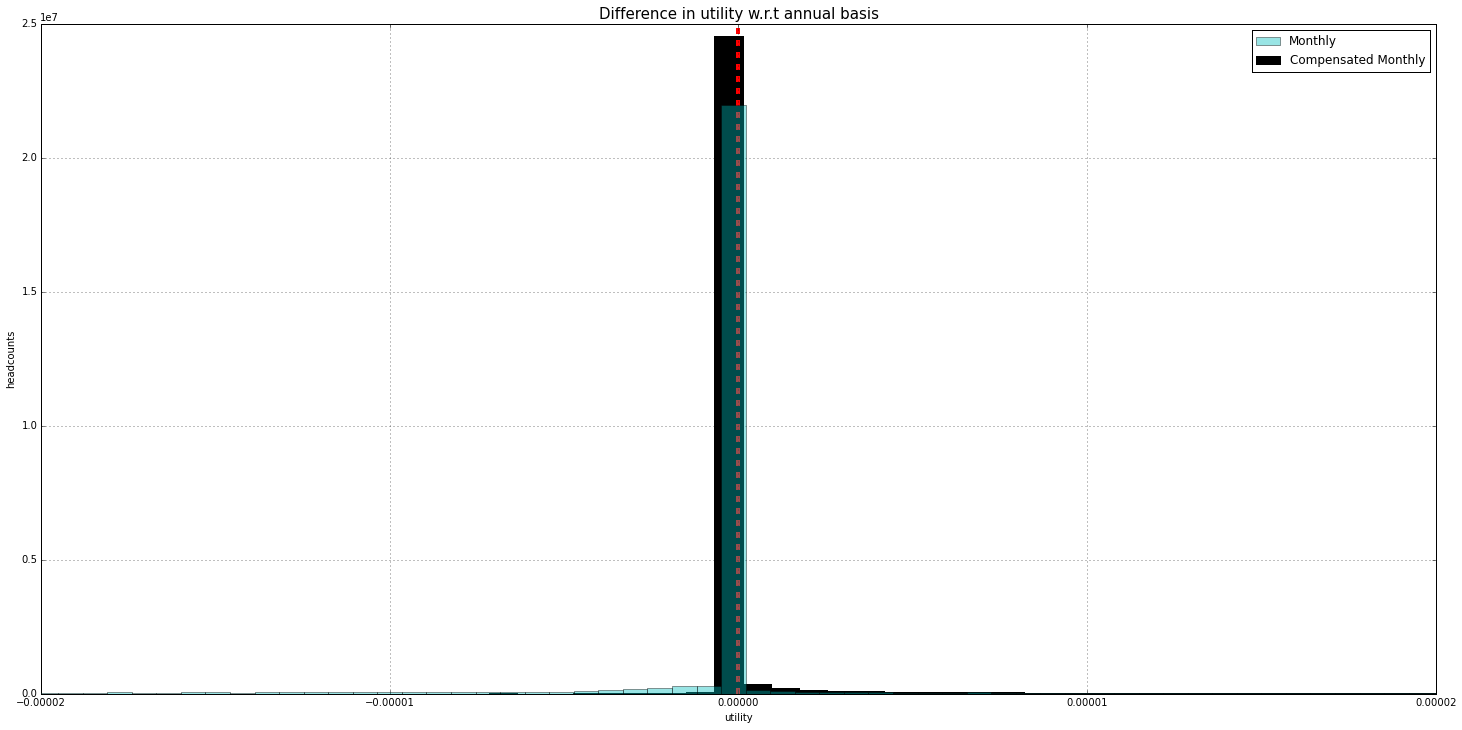

In [91]:
hist1 = ((u_ir_m - u_ir_a)).hist(bins = 3000, figsize = (25,12), weights = weight_menages, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a)).hist(bins = 3000, figsize = (25,12), weights = weight_menages,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
#plt.ylim(0,70*10**5)
plt.xlim(-0.00002, 0.00002)
plt.legend()
plt.title("Difference in utility w.r.t annual basis", size = 15)
plt.xlabel('utility')
plt.ylabel('headcounts')

In [92]:
weight_menages = pd.Series(weight_menages)

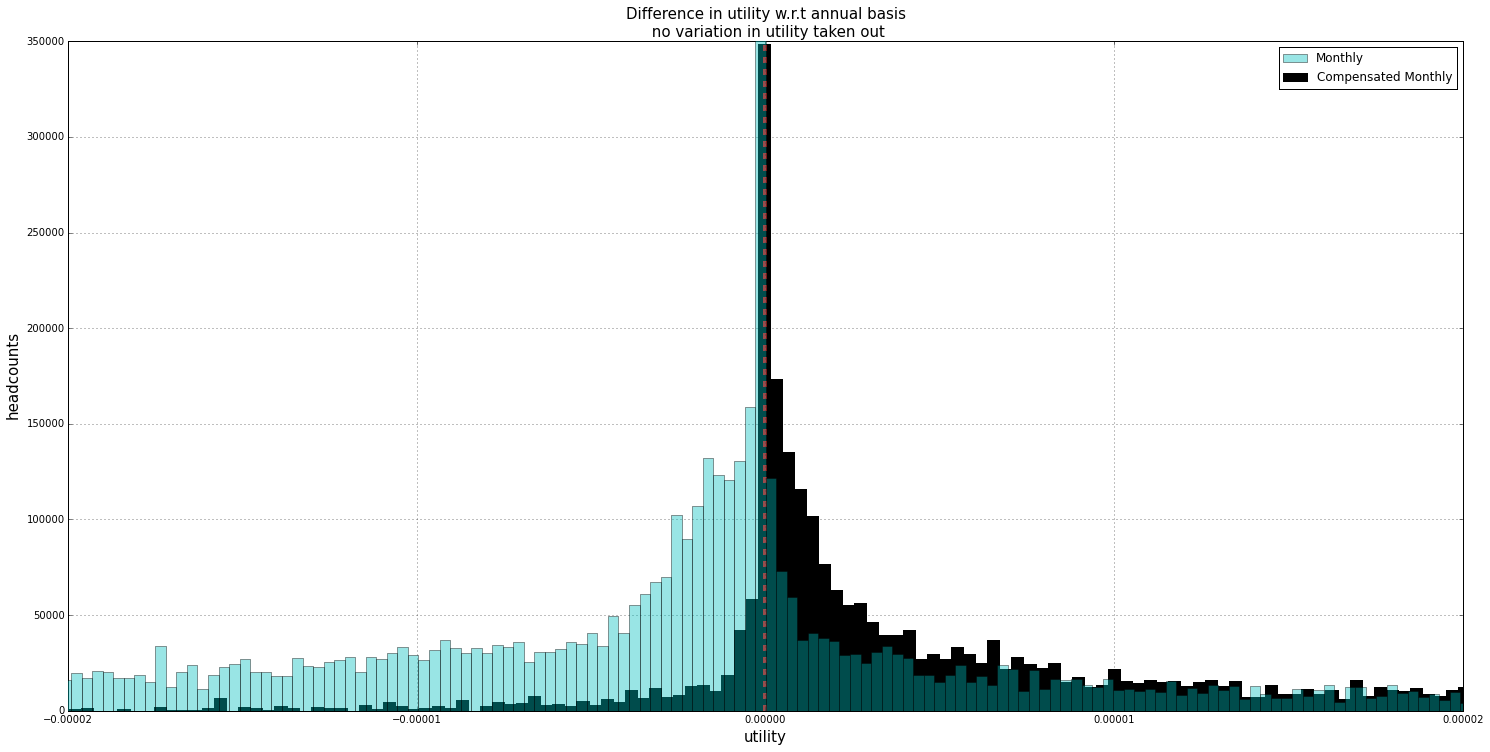

In [93]:
execute_time_consuming_graph = True
if execute_time_consuming_graph == True : 

    hist1 = ((u_ir_m - u_ir_a))[((u_ir_m - u_ir_a))!=0].hist(bins = 7000, figsize = (25,12), weights = pd.Series(weight_menages)[((u_ir_m - u_ir_a))!=0].values, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
    hist2 = ((u_c_ir - u_ir_a))[((u_c_ir - u_ir_a))!=0].hist(bins = 7000, figsize = (25,12), weights = pd.Series(weight_menages)[((u_c_ir - u_ir_a))!=0].values,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

    plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
    plt.ylim(0,35*10**4)
    plt.xlim(-0.00002, 0.00002)
    plt.legend()
    plt.title("Difference in utility w.r.t annual basis \n no variation in utility taken out", size = 15)
    plt.xlabel('utility', size = 15)
    plt.ylabel('headcounts', size = 15)

In [100]:
outliers = pd.Series(np.abs(((u_ir_m - u_ir_a))[((u_ir_m - u_ir_a))!=0])>0.00002).value_counts(normalize = True); outliers

False    0.752484
True     0.247516
dtype: float64

In [103]:
"This graph represent {}% of the tax-unit with varying utility, {}% of that sample are over 0.0002 utility points variation".format(outliers[0], outliers[1])

'This graph represent 0.752484031228% of the tax-unit with varying utility, 0.247515968772% of that sample are over 0.0002 utility points variation'

In [ ]:
pd.Series(weight_menages).shape

In [105]:
decote = survey_scenario.simulation.calculate('decote_menage')
decote_mensuel = survey_scenario.simulation.calculate_add('decote_mensuel_menage')

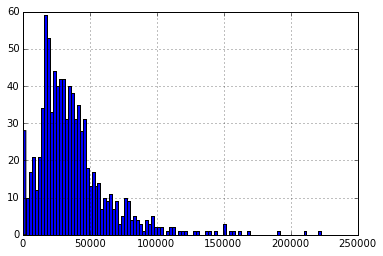

In [106]:
(pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel'))[((u_c_ir - u_ir_a)<0)]).hist(bins = 100)

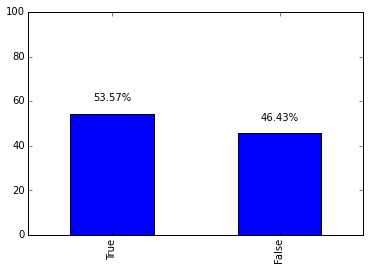

In [107]:
ax = ((pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.00000001)]).value_counts( normalize = True)*100).plot(kind = "bar",)
plt.ylim((0,100))

labels = ["{}%".format(np.round(i,2)) for i in ((pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.0000001)]).value_counts( normalize = True)*100) ] #0.000001 pour éviter les erreurs d'arrondis.
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [111]:
is_decote_different = pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.00000001)]

In [130]:
#TODO for famille and check if it coorrespond to the 46.43%
below_collection_thrshld = np.zeros(weight_foyers.shape[0], dtype=bool)
for month in range(1,13):
    irpp_mensuel = pd.Series(survey_scenario.simulation.calculate("irpp_mensuel", '2009-{}'.format(month)))
    below_collection_thrshld += (irpp_mensuel>1) & (irpp_mensuel<5.16)
    

In [129]:
pd.Series(below_collection_thrshld).value_counts()

False    59386
True       488
dtype: int64

In [120]:
np.array([True, False])+np.array([True, True])

array([ True,  True], dtype=bool)

In [123]:
#Qui sont les gagnants ? :


array([False, False], dtype=bool)

In [112]:
is_decote_different[is_decote_different==False]

66       False
966      False
1857     False
2025     False
2232     False
2414     False
2442     False
2711     False
2735     False
2781     False
2974     False
3082     False
3154     False
3228     False
3638     False
3681     False
3743     False
4518     False
4540     False
4669     False
4991     False
5201     False
5214     False
5501     False
5749     False
5868     False
6044     False
6045     False
6117     False
6124     False
6393     False
6451     False
6513     False
6613     False
6664     False
6730     False
6796     False
7418     False
7659     False
7847     False
8018     False
8223     False
8361     False
8369     False
8494     False
8547     False
8623     False
8636     False
8957     False
9231     False
9233     False
9261     False
9611     False
9649     False
10051    False
10205    False
10374    False
10404    False
10541    False
10742    False
10785    False
11016    False
11104    False
11181    False
11414    False
11872    False
11941    F

In [ ]:
pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<0.000001)].value_counts(normalize = True)

In [ ]:
(pd.Series(decote!= decote_mensuel)[((u_c_ir - u_ir_a)<0)]).hist(bins = 100)

In [ ]:
revdisp[(u_c_ir>=u_ir_a)]

In [ ]:
print u_c_ir[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_m[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_a[(decote_annual==0) & (decote_monthly==0)].mean()

## Qui sont les gagnants ?

In [157]:
print pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))>1)
print pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))<-1)

False    40493
True      8523
dtype: int64
False    47834
True      1182
dtype: int64


In [166]:
print pd.Series(((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))>1)
                     *weight_menages).sum()
print pd.Series(((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))<-1)
                      *weight_menages).sum()

4760890.0
630915.0


In [178]:
np.mean(
    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1]
    )

12579.479

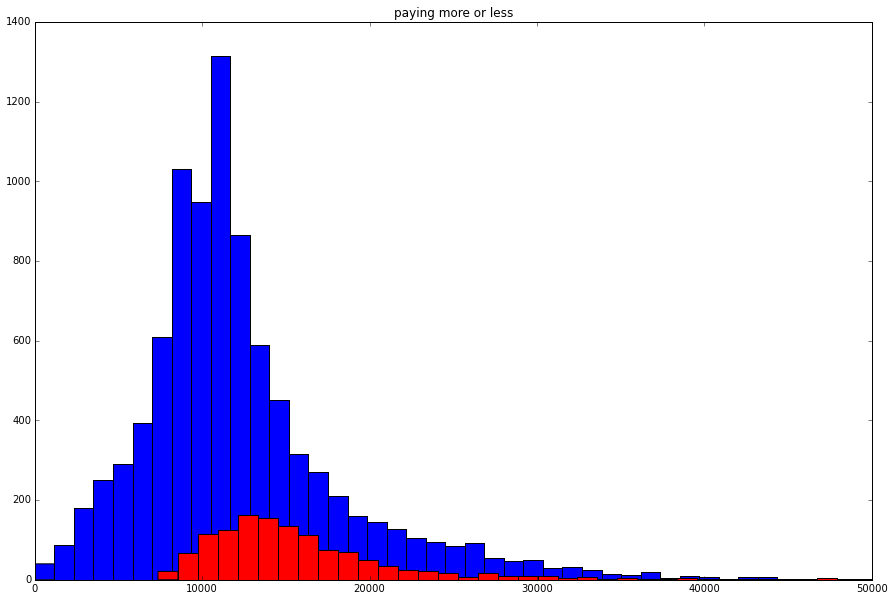

In [194]:
plt.figure(figsize=(15,10))
plt.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1], bins = 200, label = "Paying less on monthly basis")
plt.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")<-1], bins = 65, color= 'r', label = "Paying more on monthly basis")
plt.xlim(0,50000)
plt.title("paying more or less")

###### Weighted

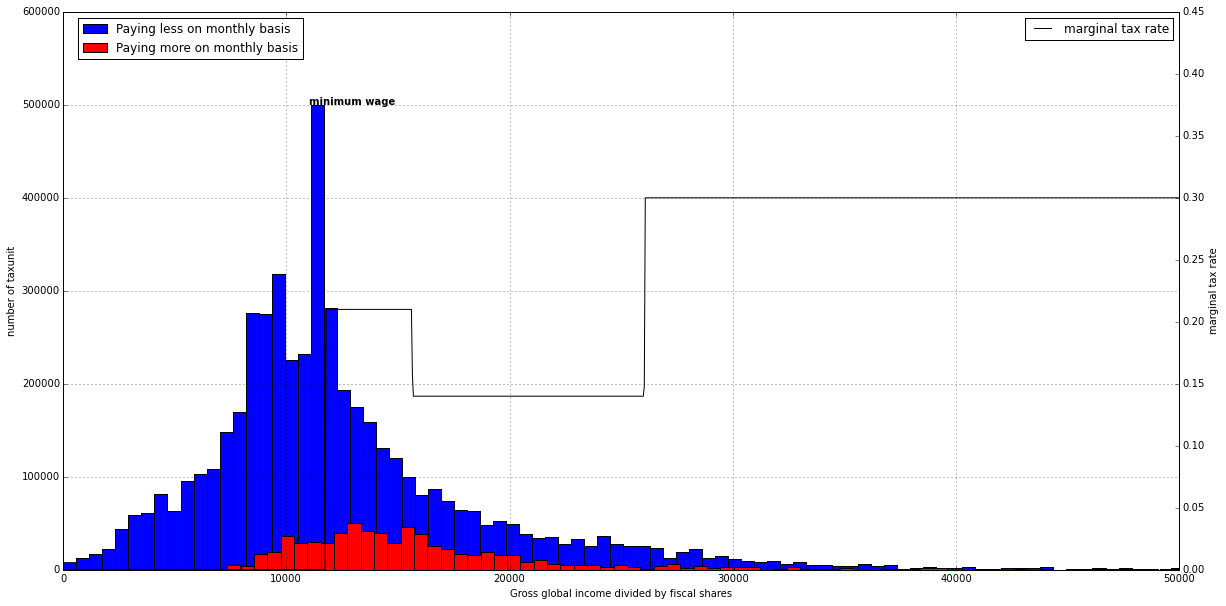

In [294]:


weights1 = weight_foyers[survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1]
weights2 = weight_foyers[survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")<-1]

fig, ax1 = plt.subplots(figsize=(20, 10))


ax1.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1], bins = 400, label = "Paying less on monthly basis", weights= weights1)
ax1.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")<-1], bins = 130, color= 'r', label = "Paying more on monthly basis",weights= weights2)


ax1.set_xlim(0,50000)
ax2 = plt.twinx()
ax2.plot(rbg_test_case[1:],marginal_rate, 'k', label = "marginal tax rate")
ax2.set_xlim(0,50000)
ax2.legend()
ax1.legend(bbox_to_anchor=(0.22, 1))
ax1.grid(which = 'both')
ax1.text(11000,500000, u"minimum wage", weight = 'bold',)
ax2.set_ylabel("marginal tax rate")
ax1.set_xlabel("Gross global income divided by fiscal shares")
ax1.set_ylabel("number of taxunit")
#plt.title("")


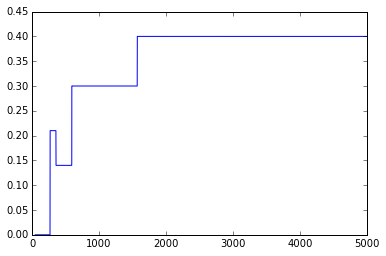

In [258]:
from openfisca_utils import make_ready_to_use_simulation
from openfisca_core import rates
simulation = make_ready_to_use_simulation.make_ready_to_use_simulation(2009,False)
rbg_test_case = simulation.calculate('rbg')
irpp_test_case = simulation.calculate('irpp')
marginal_rate = rates.marginal_rate(irpp_test_case, rbg_test_case)-1
to_change = pd.Series(marginal_rate)[marginal_rate>1].index
#to_change = pd.Series(rates.marginal_rate(irpp_test_case, rbg_test_case)-1)[rates.marginal_rate(irpp_test_case, rbg_test_case)-1>1].index
marginal_rate[to_change] = marginal_rate[to_change+1]
plt.plot(marginal_rate)

In [247]:
to_change = pd.Series(rates.marginal_rate(irpp_test_case, rbg_test_case)-1)[rates.marginal_rate(irpp_test_case, rbg_test_case)-1>1].index


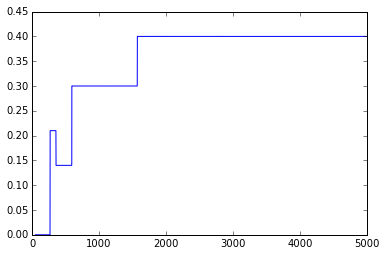

In [254]:
pd.Series(marginal_rate)[marginal_rate>1]

In [174]:
np.mean(survey_scenario.simulation.calculate("rbg"))

23384.496

array([ 2.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32)

In [161]:
np.array([True,True,False]) *np.array([2,3,4])

array([2, 3, 0])

In [145]:
pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel") - survey_scenario.simulation.calculate_add("revdisp_mensuel_compensated_ir_mensuel")>1)

False    48252
True       764
dtype: int64

#### Same annalysis with benefits

In [ ]:
survey_scenario.compute_aggregate("rsa_socle_majore_mensualise")

In [ ]:
survey_scenario.compute_aggregate("rsa_non_majore")

In [ ]:
pd.Series(survey_scenario.simulation.calculate("rsa_eligibilite_tns", "2009-01")).value_counts()

# END

### Utility :

In [ ]:
def utility(array = None, hp_young_coef = 0.89):
    reference = mesures.revdisp
    label = u"Revenu disponible du ménage"
    def function(self, simulation, period):
        '''
        Revenu disponible - ménage
        'men'
        '''
        utility = -(array + 5000) **-hp_young_coef #on ajoute 5000 pour pas avoir les familles à 0 de revdisp qui font - inf

        return utility

### Taux d'intérêt

In [ ]:
def revdisp_tx(var = None, taux = None):
    revdisp_i = 0
    for month in range(0,12):
        monthly_taux = ((1+taux)**(1/12)) 
        revdisp_i += (
            survey_scenario.simulation.calculate(var, survey_scenario.simulation.period.offset(month, 'month').this_month) 
            / (monthly_taux)**month 
                      )
    return revdisp_i


In [ ]:
revdisp_tx('revdisp_mensuel_ir_mensuel', 1.6)

In [ ]:
survey_scenario.simulation.period.offset(2, 'month').this_month

In [ ]:
variable = 'rsa'
monthly_df = pd.DataFrame(
                dict((column_name+"_"+period, survey_scenario.simulation.calculate_add(column_name, period)) 
                for period in ['{}-{}'.format( 2009, str(month).zfill(2)) for month in range(1, 13)] for column_name in [variable]) #TODO mensualize : allow for periods
                )
monthly_df.T

In [ ]:
ir_comp_df = pd.DataFrame({'diference':(survey_scenario.simulation.calculate("irpp") - (survey_scenario.simulation.calculate_add("irpp_mensuel")/(lambda_compensation+12))*12),
                           'ir_annuel' : survey_scenario.simulation.calculate("irpp"),
                           'ir_mensuel' :  survey_scenario.simulation.calculate("irpp_mensuel"),
                           'ir_mensuel_compensated' :  (survey_scenario.simulation.calculate_add("irpp_mensuel")/(lambda_compensation+12))*12,
                           'lambda_c' : survey_scenario.simulation.calculate("lambda_compensation"),
                           })
ir_comp_df[ir_comp_df.diference > 10]
#ir_comp_df[ir_comp_df.lambda_c > 1]

In [ ]:
print (ir_comp_df[np.abs(ir_comp_df.difence )>10].ir_annuel == 0).value_counts()
ir_comp_df[np.abs(ir_comp_df.difence )>10] # Tout les Ir_mensuel dif

## Tests of conformity

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rev_sal'),survey_scenario.simulation.calculate_add("rev_sal_mensuel_times_12")/12, decimal = 1,
                                    ) #Good


In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('salcho_imp'),survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12, decimal = 0,
                                    )  #Semble normal, ce sont les 4% qui touchent les plafonds tspr.abat_pro min et max TODO: à vérifier que c'est bien celà, voir tout en bas.


In [ ]:
print survey_scenario.compute_aggregate('salcho_imp')/10**9
print survey_scenario.compute_aggregate('salcho_imp_mensuel_times_12')/12/10**9

In [ ]:
filter_salcho_imp = ~(np.abs(survey_scenario.simulation.calculate('salcho_imp')- survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12)>2)

In [ ]:

np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate_add('sal_pen_net'),
                                     survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12, decimal = -1,
                                    )

In [ ]:
print survey_scenario.compute_aggregate('sal_pen_net')/10**9
print survey_scenario.compute_aggregate('sal_pen_net_mensuel_times_12')/12/10**9

In [ ]:
print survey_scenario.compute_aggregate('retraite_imposable')/10**9 +  survey_scenario.compute_aggregate('pen_net')/10**9


In [ ]:
np.testing.assert_array_almost_equal(pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net'))[filter_salcho_imp],
                                     pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12)[filter_salcho_imp], decimal = -1,
                                    )

In [ ]:
print survey_scenario.compute_aggregate('sal_pen_net')/10**9
print survey_scenario.compute_aggregate('sal_pen_net_mensuel_times_12')/12/10**9

In [ ]:
print survey_scenario.simulation.calculate_add("sal_pen_net_mensuel_times_12").sum()/12
print ((survey_scenario.simulation.calculate("sal_pen_net").sum()/1)*survey_scenario.simulation.calculate("wprm").sum())
print (survey_scenario.simulation.calculate("sal_pen_net").sum()/1 - survey_scenario.simulation.calculate_add("sal_pen_net_mensuel_times_12").sum()/12)

In [ ]:
survey_scenario.compute_aggregate('sal_pen_net')/10**9

In [ ]:
np.testing.assert_array_almost_equal(pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net'))[filter_salcho_imp],
                                     pd.Series(survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12)[filter_salcho_imp], decimal = -1,
                                    )

In [ ]:
df = pd.DataFrame({'annuel':survey_scenario.simulation.calculate('salcho_imp'),'mensuel':survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12,
                  'frais_reels': survey_scenario.simulation.calculate('frais_reels', "2009"),
                  
                  })
df = df[np.abs(df.annuel - df.mensuel)>1]
print df.shape
df

In [ ]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')/10**9

In [ ]:
lambdac = survey_scenario.simulation.calculate('lambda_compensation')

In [ ]:
survey_scenario.simulation.calculate('irpp_mensuel','2009-01')

In [ ]:
print survey_scenario.simulation.period

In [ ]:
variable ='salaire_imposable'
pd.DataFrame({'tspr':survey_scenario.simulation.calculate(variable,'2009'), variable: survey_scenario.simulation.calculate_add(variable)})

In [ ]:

#survey_scenario = create_survey_scenario(2009)
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['irpp','irpp_mensuel','rng','rng_mensuel_times_12'], ['irpp_mensuel'])['foyers_fiscaux']; df1

In [ ]:
df1[df1.irpp == df1.irpp_mensuel].shape

In [ ]:
df1[df1.irpp != df1.irpp_mensuel]

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('salcho_imp'),survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12, decimal = -2,
                                    )


In [ ]:
variable = 'frais_reels'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}'.format(variable)], ['{}'.format(variable)])['individus']; 
df1['{}'.format(variable)] = df1['{}'.format(variable)]/12
df1.T

In [ ]:
survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rng'),survey_scenario.simulation.calculate_add('rng_mensuel_times_12')/12, decimal = -2,
                                    )


In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rbg'),survey_scenario.simulation.calculate_add('rbg_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:

np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('rev_cat_tspr'),survey_scenario.simulation.calculate_add('rev_cat_tspr_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:

np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate_add('sal_pen_net'),survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:
np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate_add('sal_pen_net'),survey_scenario.simulation.calculate_add('sal_pen_net_mensuel_times_12')/12, decimal = -2,
                                    )

In [ ]:
pd.Series(survey_scenario.simulation.calculate('chomage_imposable','2009-02')).value_counts()

In [ ]:
pd.Series(survey_scenario.simulation.calculate('chomage_imposable')==0).value_counts()

In [ ]:
sal_pen_df = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['sal_pen_net','sal_pen_net_mensuel_times_12'], ['sal_pen_net_mensuel_times_12'])['individus']
sal_pen_df[sal_pen_df.sal_pen_net != sal_pen_df.sal_pen_net_mensuel_times_12/12].T

In [ ]:
variable = 'salaire_imposable'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}'.format(variable)], ['{}'.format(variable)])['individus']; 
df1['{}'.format(variable)] = df1['{}'.format(variable)]/12
df1.T

In [ ]:
#RTO déclarant 1 tous nul
pd.Series(survey_scenario.simulation.calculate('rto_net_declarant1') == 0).value_counts()

In [ ]:
variable = 'salcho_imp'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}_mensuel_times_12'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['individus']; 
df1['{}_mensuel_times_12'.format(variable)] = df1['{}_mensuel_times_12'.format(variable)]/12
df1.T

In [ ]:
pd.DataFrame({'1absolute':survey_scenario.simulation.calculate('rev_cat_tspr')- survey_scenario.simulation.calculate('rev_cat_tspr_mensuel_times_12')/12,
              '2relatif': (survey_scenario.simulation.calculate('rev_cat_tspr') - survey_scenario.simulation.calculate('rev_cat_tspr_mensuel_times_12')/12) /survey_scenario.simulation.calculate('rev_cat_tspr'),
              '3annuel': survey_scenario.simulation.calculate('rev_cat_tspr'),
              '4mensuel': survey_scenario.simulation.calculate('rev_cat_tspr_mensuel_times_12')/12,
             
             
             })

In [ ]:
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['rng'], ['rng_mensuel_times_12'])['foyers_fiscaux']; df1.T

In [ ]:
variable = 'rbg'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}_mensuel_times_12'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['foyers_fiscaux']; 
df1['{}_mensuel_times_12'.format(variable)] = df1['{}_mensuel_times_12'.format(variable)]/12
df1.T

In [ ]:
variable = 'rev_cat_tspr'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}_mensuel_times_12'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['foyers_fiscaux']; 
df1['{}_mensuel_times_12'.format(variable)] = df1['{}_mensuel_times_12'.format(variable)]/12
df1.T

In [ ]:
pd.DataFrame({'tspr':survey_scenario.simulation.calculate("tspr"), 'tspr_mensuel_times12': survey_scenario.simulation.calculate_add('tspr_mensuel_times_12')/12})

In [ ]:
variable ='salaire_imposable'
pd.DataFrame({'tspr':survey_scenario.simulation.calculate(variable,'2009'), variable: survey_scenario.simulation.calculate_add(variable)})

In [ ]:
survey_scenario.simulation.calculate("tspr_mensuel_times_12", '2009-01')

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural_by_period(['irpp_mensuel'], periods_list = ['2009-01','2009-02','2009-03'])['foyers_fiscaux'];df.concat(df1)

In [ ]:
trash_2 = survey_scenario.create_data_frame_by_entity_key_plural_by_period(['salaire_net'], periods_list = ['a','2013'])

In [ ]:
trash['foyers_fiscaux']

In [ ]:
import logging

log = logging.getLogger(__name__)

In [ ]:
log.error('boum')

In [ ]:
periods_list = ["20126"]
for period in periods_list:
            try:
                periods.period(period)
                print 'good'
            except ValueError:
                #log.info("{} in your periods dict is not an OpenFisca period".format(period))
                raise
                print'bad'
                pass

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(variables = ['irpp','irpp_mensuel','rng', 'blob'])['foyers_fiscaux'];df

In [ ]:
survey_scenario.tax_benefit_system.

In [ ]:
survey_scenario.create_data_frame_by_entity_key_plural(variables = ['irpp','irpp_mensuel', 'sali'])

In [ ]:
df[df.irpp +0.05 > df.irpp_mensuel]

In [ ]:
pd.Series((survey_scenario.simulation.calculate('salaire_imposable')>0)).value_counts()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
lambdac = pd.Series(lambdac)

In [ ]:
lambdac.loc[(lambdac == -np.inf)|lambdac.isnull()]=0

In [ ]:
#lambdac.drop(lambdac.loc[((lambdac<0.1) & (lambdac>-0.1))].index, inplace = True)

In [ ]:
lambdac.drop(lambdac.loc[((lambdac>200) | (lambdac<-200))].index, inplace = True)

In [ ]:
lambdac.min()

In [ ]:
lambdac.hist(bins=100)
plt.xlim(-50,150)
plt.ylim(0,2700)

In [ ]:
lambdac[((lambdac>40) & (lambdac<55))].hist(bins = 100)

In [ ]:
pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel')-survey_scenario.simulation.calculate_add('irpp')).hist(bins = 10**4)
#plt.ylim(0,100)
plt.xlim(0,100)

In [ ]:
print survey_scenario.weight_column_name_by_entity_key_plural
survey_scenario.simulation.calculate_add(survey_scenario.weight_column_name_by_entity_key_plural['foyers_fiscaux'], period = period).astype(float)

In [ ]:
weight_foyers = survey_scenario.simulation.calculate_add('weight_foyers', period = period).astype(float)

### Stat de Base sur la différence

In [ ]:
# We put positive value for income tax (negative in openfisca output)
impot_annuel =  -survey_scenario.simulation.calculate('irpp')
impot_mensuel =  -survey_scenario.simulation.calculate_add('irpp_mensuel')

In [ ]:
print "il y a {}/{} cas ou l'impot annuel est null soit {}%".format((impot_annuel == 0).sum(),impot_mensuel.shape[0],(impot_annuel == 0).sum()/impot_mensuel.shape[0] )

In [ ]:
impot_annuel = survey_scenario.simulation.calculate('irpp')
impot_mensuel = survey_scenario.simulation.calculate_add('irpp_mensuel')
print "il y a {}/{} cas ou l'impot annuel et mensuel est null soit {}%".format(((impot_annuel == 0) & (impot_mensuel == 0)).sum(),impot_mensuel.shape[0],((impot_annuel == 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0] )
print "il y a {}/{} cas ou l'impot mensuel est null, mais pas l'annuel soit {}% (pas possible ?)".format(((impot_annuel != 0) & (impot_mensuel == 0)).sum(), impot_mensuel.shape[0],((impot_annuel != 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel > impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel > impot_mensuel).sum()/ impot_mensuel.shape[0])


#### Annuel == mensuel 

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel soit {}% ".format((np.abs(impot_annuel - impot_mensuel)==0).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)==0).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel (à 1 cents près) soit {}% ".format((np.abs(impot_annuel - impot_mensuel)<0.01).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)<0.01).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel (à 1 euros près) soit {}% ".format((np.abs(impot_annuel - impot_mensuel)<1).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)<1).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est égal à l'annuel (à 10 euros près) soit {}% ".format((np.abs(impot_annuel - impot_mensuel)<10).sum(), impot_mensuel.shape[0], (np.abs(impot_annuel - impot_mensuel)<10).sum()/ impot_mensuel.shape[0])

####  mensuel < annuel (supposé être l'exception)

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel > impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel > impot_mensuel).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel (à 10 euros près) soit {}% (pas possible ?)".format((impot_annuel-impot_mensuel >10 ).sum(), impot_mensuel.shape[0], ((impot_annuel-impot_mensuel >10)).sum()/ impot_mensuel.shape[0])

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel (à 10 euros près) soit {}% (pas possible ?)".format((impot_annuel-impot_mensuel >10 ).sum(), impot_mensuel.shape[0], ((impot_annuel-impot_mensuel >10)).sum()/ impot_mensuel.shape[0])

####  mensuel < annuel (supposé être la norme)

In [ ]:
print "il y a {}/{} cas ou l'impot mensuel est supérieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel < impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel < impot_mensuel).sum()/ impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est supérieur à l'annuel (à 10 euros près) soit {}% (pas possible ?)".format((impot_mensuel-impot_annuel >10 ).sum(), impot_mensuel.shape[0], ((impot_mensuel-impot_annuel >10)).sum()/ impot_mensuel.shape[0])

In [ ]:
irpp_mois_list = 'ir'

## Différence annuel vs. mensuel

### Perdants

In [ ]:
simulation.calculate

####  mensuel < annuel

In [ ]:
survey_scenario.weight_column_name_by_entity_key_plural

### Nul du à la décote

In [ ]:
decote = survey_scenario.simulation.calculate_add('decote')
ir_plaf_qf = survey_scenario.simulation.calculate_add('ir_plaf_qf')

decote_m = survey_scenario.simulation.calculate_add('decote_mensuel_times_12')
ir_plaf_qf_m = survey_scenario.simulation.calculate_add('ir_plaf_qf_mensuel_times_12')

decote = min_(decote, ir_plaf_qf)
decote_m = min_(decote_m, ir_plaf_qf)

In [ ]:
irpp_mois_list = ['irpp_mois{}'.format(month) for month in range(1,13)]

### DIfférence de décote

In [ ]:
(survey_scenario.compute_aggregate('decote_mensuel_times_12')/12) - (survey_scenario.compute_aggregate('decote'))

## ANnalyse

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel'])['foyers_fiscaux']

In [ ]:
irpp_month = survey_scenario.simulation.calculate('irpp_mensuel', '2009-{}'.format(month))

for month in range(1,13):
    irpp_month = survey_scenario.simulation.calculate('irpp_mensuel', '2009-{}'.format(month))
    irpp_serie = pd.Series(irpp_month, name = 'irpp_{}'.format(month))
    df = df.T.append(irpp_serie).T

In [ ]:
df.T

### Droppe les cas où la différence d'impôt est inférieure à 10 euros

In [ ]:
import numpy as np

In [ ]:
df_ir_1 = df[(np.abs(df.irpp - df.irpp_mensuel) - 5)> 0 ]

In [ ]:
df_ir_1.shape

In [ ]:
(df.decote_gain_fiscal> df.decote_gain_fiscal_mensuel_times_12/12).shape

### Droppe les cas où l'impôt mensuel est supérieur à l'annuel

In [ ]:
df_ir_sup_ir_m = df_ir_1[df_ir_1.irpp < df_ir_1.irpp_mensuel ]

In [ ]:
df_ir_sup_ir_m.T

In [ ]:
print "il y a {} cas ou l'impôt annuel est supérieur au mensuel".format(df_ir_sup_ir_m.shape[0])

#### Différence due à la décote

In [ ]:
df_ir_sup_ir_m.irpp + df_

In [ ]:
df_ir_sup_ir_m.T

In [ ]:
df.irpp

In [ ]:
survey_scenario.create_data_frame_by_entity_key_plural(['irpp','ip_net', ])['foyers_fiscaux']

In [ ]:
survey_scenario.compute_aggregate('irpp')/10**9

In [ ]:
survey_scenario.compute_aggregate('irpp')/10**9

In [ ]:
survey_scenario.compute_aggregate('irpp_mensuel')/10**9

In [ ]:
((impot_annuel == 0) & (impot_mensuel == 0)).sum()

In [ ]:
survey_scenario.compute_pivot_table(columns = ['nbF'], values = ["irpp"])

In [ ]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['irpp','ip_net', ])['foyers_fiscaux']

In [ ]:
#### Modified Adrien


from numpy import (datetime64, logical_and as and_, logical_not as not_, logical_or as or_, logical_xor as xor_,
maximum as max_, minimum as min_, round)


lambda_compensation = simulation.calculate_add("lambda_compensation")
import pandas as pd
lambda_compensation = pd.Series(lambda_compensation)
print lambda_compensation.isnull().value_counts() #on devrait avoir autant de lambda compensation null que d'IR

higher_mensual = pd.Series((simulation.calculate_add("irpp_mensuel")> simulation.calculate_add('irpp'))).value_counts(dropna = False)
print "There is {} higher mensual then annual IR (not supposed to happened)".format(higher_mensual)

impot_annuel = simulation.calculate("irpp")
impot_mensuel = simulation.calculate_add("irpp_mensuel")
print "il y a {}/{} cas ou l'impot annuel et mensuel est null soit {}%".format(((impot_annuel == 0) & (impot_mensuel == 0)).sum(),impot_mensuel.shape[0],((impot_annuel == 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0] )
print "il y a {}/{} cas ou l'impot mensuel est null, mais pas l'annuel soit {}% (pas possible ?)".format(((impot_annuel != 0) & (impot_mensuel == 0)).sum(), impot_mensuel.shape[0],((impot_annuel != 0) & (impot_mensuel == 0)).sum()/impot_mensuel.shape[0])
print "il y a {}/{} cas ou l'impot mensuel est inférieur à l'annuel soit {}% (pas possible ?)".format((impot_annuel > impot_mensuel).sum(), impot_mensuel.shape[0], (impot_annuel > impot_mensuel).sum()/ impot_mensuel.shape[0])


irpp = pd.Series(simulation.calculate("irpp"), name = "irpp")
irpp_mensuel = pd.Series(simulation.calculate("irpp_mensuel"),name = 'irpp_mensuel')
decote = pd.Series(simulation.calculate("decote"), name = "decote")
ir_plaf_qf = pd.Series(simulation.calculate("ir_plaf_qf"))
decote = min_(decote, ir_plaf_qf)


ir_plaf_qf_m = pd.Series(simulation.calculate_add("ir_plaf_qf_mensuel_times_12"))
decote_m = pd.Series(simulation.calculate_add("decote_mensuel_times_12"))
decote_m = min_(decote_m, ir_plaf_qf_m)/12

print u"le gain fiscal de la décote est {}% plus élevé en mensuel".format(((decote_m.sum()/decote.sum()-1))*100)




ppe = pd.Series(simulation.calculate("ppe"), name="ppe")

#Qui sont ceux qui payent de l'impôt en trop en mensuel ?


#7657 ;
annomalie = (impot_mensuel<impot_annuel +1) | (impot_mensuel<impot_annuel - 1) #gérer les tout petits problèmes d'arrondis

print u"{}% payent plus en annuel à cause de la décote (ou tout du moins en partie)".format((decote_m[annomalie]==0).value_counts(normalize = True)[0])
print (decote_m[annomalie]==0).value_counts(normalize = True)
#D'ou viennent les autres annomalies, pourquoi plus d'ir en annuel



df_ir_mois = pd.DataFrame()
for mois in range(1,13):
    tempo = pd.Series(simulation.calculate('irpp_mensuel', '2009-{}'.format(mois)))
    tempo.name = 'irpp_mois_{}'.format(mois)
    df_ir_mois = df_ir_mois.append(tempo)

df_ir_mois = df_ir_mois.append(irpp)
df_ir_mois = df_ir_mois.append(irpp_mensuel)

decote.name = "decote"
df_ir_mois = df_ir_mois.append(decote)

decote_m.name = "decote_m"
df_ir_mois = df_ir_mois.append(decote_m)


df_ir_mois.to_hdf('/Users/adrienpacifico/Desktop/to_trash.h5', 'df_ir_mois')


mr = 17352


# Controle

In [ ]:
variable = 'salcho_imp'
df1 = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector([variable, '{}'.format(variable)], ['{}_mensuel_times_12'.format(variable)])['individus']; 
#df1 = df1[df1['{}'.format(variable)] != df1['{}'.format(variable)]]
df1["somme_annuelle"] = (df1.sum(axis = 1) - df1.salcho_imp)/12
df1 = df1[ np.abs(df1['{}'.format("somme_annuelle")] - df1['{}'.format(variable)] >2)]
df1.T

In [ ]:
df = pd.DataFrame({'annuel':survey_scenario.simulation.calculate('salcho_imp'),'mensuel':survey_scenario.simulation.calculate_add("salcho_imp_mensuel_times_12")/12,
                  'frais_reels': survey_scenario.simulation.calculate('frais_reels', "2009"),
                  
                  })
df = df[np.abs(df.annuel - df.mensuel)>1]
print df.shape
df